In [ ]:
def testForInput():
    return 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model

from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

import plotly.graph_objects as go

import plotly as py

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


# Tomamos los distintos csv importantes

In [2]:
enron = pd.read_csv("./data/features-enron.csv")
phi = pd.read_csv("./data/features-phishing.csv")

In [4]:
phi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2256 non-null   int64 
 1   @ in URLs           2256 non-null   bool  
 2   Attachments         2256 non-null   int64 
 3   Css                 2256 non-null   int64 
 4   Encoding            2256 non-null   object
 5   External Resources  2256 non-null   int64 
 6   Flash content       2256 non-null   bool  
 7   HTML content        2256 non-null   bool  
 8   Html Form           2256 non-null   bool  
 9   Html iFrame         2256 non-null   bool  
 10  IPs in URLs         2256 non-null   bool  
 11  Javascript          2256 non-null   int64 
 12  Phishy              2256 non-null   bool  
 13  URLs                2256 non-null   int64 
dtypes: bool(7), int64(6), object(1)
memory usage: 138.9+ KB


In [5]:
enron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2256 non-null   int64 
 1   @ in URLs           2256 non-null   bool  
 2   Attachments         2256 non-null   int64 
 3   Css                 2256 non-null   int64 
 4   Encoding            2256 non-null   object
 5   External Resources  2256 non-null   int64 
 6   Flash content       2256 non-null   bool  
 7   HTML content        2256 non-null   bool  
 8   Html Form           2256 non-null   bool  
 9   Html iFrame         2256 non-null   bool  
 10  IPs in URLs         2256 non-null   bool  
 11  Javascript          2256 non-null   int64 
 12  Phishy              2256 non-null   bool  
 13  URLs                2256 non-null   int64 
dtypes: bool(7), int64(6), object(1)
memory usage: 138.9+ KB


In [6]:
phi.Phishy.value_counts()

True    2256
Name: Phishy, dtype: int64

In [7]:
enron.Phishy.value_counts()

False    2256
Name: Phishy, dtype: int64

In [8]:
phi.sample(10)


,Unnamed: 0,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
904,904,False,0,0,7bit,0,False,True,False,False,True,2,True,24
2058,2058,False,0,0,none,0,False,True,False,False,False,0,True,5
1781,1781,False,0,0,none,0,False,True,False,False,False,0,True,1
1981,1981,False,0,0,none,0,False,True,False,False,False,0,True,3
1035,1035,False,0,0,none,0,False,True,False,False,False,1,True,6
2208,2208,False,0,0,none,0,False,True,False,False,False,0,True,2
1552,1552,False,0,0,none,0,False,True,False,False,True,0,True,44
602,602,False,0,0,none,0,False,True,False,False,False,0,True,2
600,600,False,0,0,none,0,False,True,False,False,False,0,True,2
1788,1788,False,0,0,7bit,0,False,True,False,False,False,0,True,2


In [9]:
phi.value_counts()


Unnamed: 0  @ in URLs  Attachments  Css  Encoding  External Resources  Flash content  HTML content  Html Form  Html iFrame  IPs in URLs  Javascript  Phishy  URLs
0           False      0            0    none      0                   False          True          False      False        True         0           True    2       1
1507        False      0            0    7bit      0                   False          True          False      False        True         0           True    1       1
1501        False      0            0    none      0                   False          True          False      False        False        0           True    3       1
1502        False      0            0    7bit      0                   False          True          False      False        False        0           True    6       1
1503        False      0            0    8bit      0                   False          True          False      False        False        0           True    13      1
   

In [10]:
phi["External Resources"].value_counts()

0     2218
1       18
2       11
4        4
11       2
3        1
5        1
7        1
Name: External Resources, dtype: int64

<AxesSubplot:>

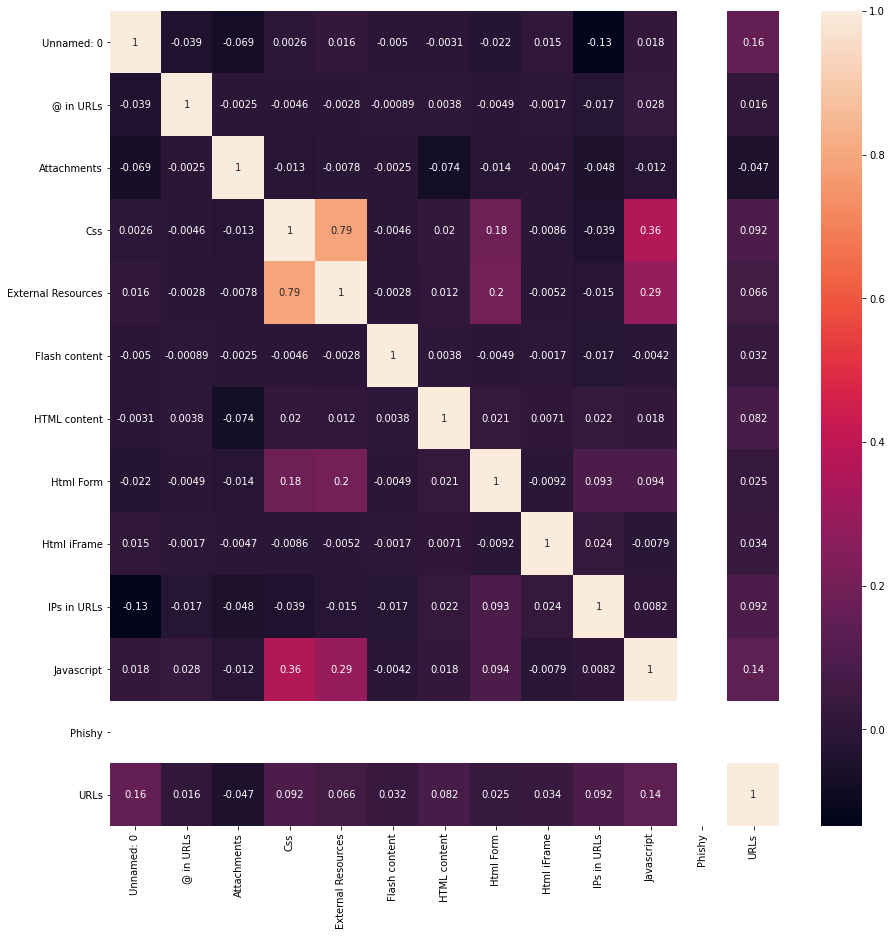

In [11]:
fix, ax = plt.subplots(figsize=(15,15))
sns.heatmap(phi.corr(),annot = True, ax= ax)

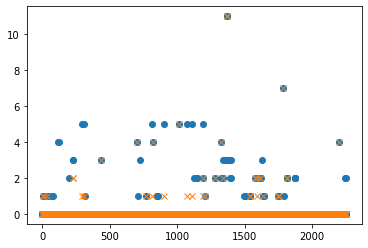

In [12]:
plt.plot(phi.Css ,"o")
plt.plot(phi["External Resources"], "x")

In [13]:
enron.sample(10)

,Unnamed: 0,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
646,646,False,0,0,7bit,0,False,False,False,False,False,0,False,0
916,916,False,0,0,7bit,0,False,True,False,False,False,0,False,2
36,36,False,0,0,7bit,0,False,False,False,False,False,0,False,0
63,63,False,0,0,7bit,0,False,False,False,False,False,0,False,0
1167,1167,False,0,0,7bit,0,False,True,False,False,False,0,False,0
2196,2196,False,0,0,7bit,0,False,False,False,False,False,0,False,0
1268,1268,False,0,0,7bit,0,False,False,False,False,False,0,False,1
878,878,False,0,0,7bit,0,False,True,False,False,False,0,False,1
168,168,False,0,0,7bit,0,False,False,False,False,False,0,False,0
436,436,False,0,0,7bit,0,False,False,False,False,False,0,False,0


In [14]:
phi.sample(10)

,Unnamed: 0,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
1517,1517,False,0,0,quoted-printable,0,False,True,False,False,True,0,True,3
2138,2138,False,0,0,7bit,0,False,True,False,False,False,0,True,20
1773,1773,False,0,0,none,0,False,True,False,False,False,0,True,1
2246,2246,False,0,0,7bit,0,False,True,False,False,False,0,True,20
73,73,False,0,0,none,0,False,True,False,False,True,0,True,12
233,233,False,0,0,none,0,False,True,False,False,True,0,True,2
292,292,False,0,0,7bit,0,False,False,False,False,False,0,True,0
2104,2104,False,0,0,7bit,0,False,True,False,False,False,0,True,8
410,410,False,0,0,none,0,False,True,False,False,False,0,True,1
126,126,False,0,0,none,0,False,True,False,False,False,0,True,1


In [15]:
#define fullReplaced

frames = [enron, phi]
full = pd.concat(frames)
full = full.drop(columns=("Unnamed: 0"))

fullReplaced = full

In [16]:
#Clena fullReplaced
# repalce values in Encoding to categorical values

def replace(column, find, value):
    fullReplaced[column] = fullReplaced[column].replace(find, value)
    
replace("Encoding", ["7bit", "7bit "], 1)
replace("Encoding", "none", 2)
replace("Encoding", "quoted-printable", 3)
replace("Encoding", "8bit", 4)
replace("Encoding", "8bit\\r\\n", 5)
replace("Encoding", "base64", 6)
replace("Encoding", "7bit\n\tboundary=\"--vhoabg67774\"", 7)

#replace True with 1 and False with 0 in
# @ in URLs Flash content	HTML content	Html Form	Html iFrame	IPs in URLs

def replaceBool(columnList):
    for i in columnList:
        fullReplaced[i] = fullReplaced[i].astype(int)

replaceBool(["@ in URLs", "Flash content", "HTML content","Html Form", "Html iFrame", "IPs in URLs", "Phishy"])

<AxesSubplot:>

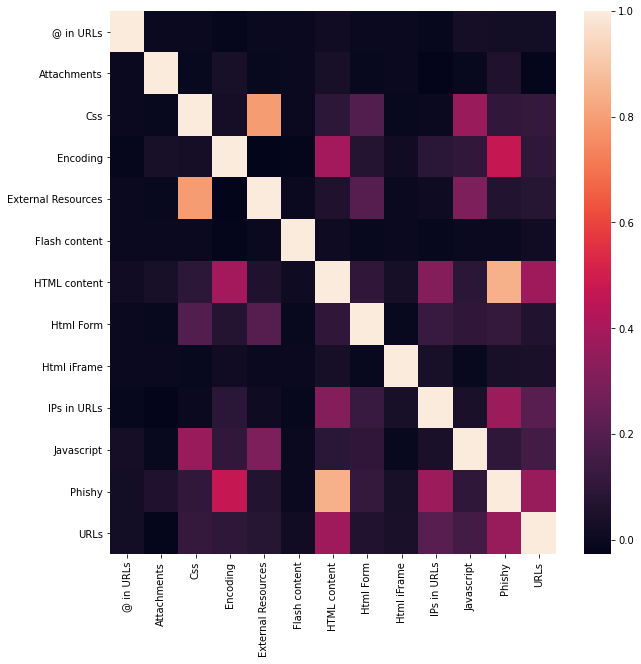

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(fullReplaced.corr(), annot=False, ax=ax)

# We now have a clean dataset to with with: fullReplaced

In [18]:
def createDummies(column, prefix):
    global fullReplaced
    for i, j in zip(column,prefix):
        fullReplaced = pd.concat([fullReplaced, pd.get_dummies(data = fullReplaced[i], prefix = j, drop_first=True)], axis= 1)

In [19]:
fullReplaced.columns

Index(['@ in URLs', 'Attachments', 'Css', 'Encoding', 'External Resources',
       'Flash content', 'HTML content', 'Html Form', 'Html iFrame',
       'IPs in URLs', 'Javascript', 'Phishy', 'URLs'],
      dtype='object')

In [20]:
columnsForDummies = ['@ in URLs', 'Attachments', 'Css', 'Encoding', 'External Resources',
       'Flash content', 'HTML content', 'Html Form', 'Html iFrame',
       'IPs in URLs', 'Javascript', 'URLs']

prefixForDummies = ["@url", "att", "css", "enco", "externalRe", "flashCon", "htmlCon", "htmlForm", "htmlIfram", "ips", "js", "urls"]

In [21]:
createDummies(columnsForDummies, prefixForDummies)

In [22]:
fullReplaced.shape

(4512, 124)

In [23]:
fullReplaced = fullReplaced.drop(columns=['@ in URLs', 'Attachments', 'Css', 'Encoding', 'External Resources',
       'Flash content', 'HTML content', 'Html Form', 'Html iFrame',
       'IPs in URLs', 'Javascript', 'URLs'])

In [24]:
fullReplaced.head()

,Phishy,@url_1,att_1,att_2,css_1,css_2,css_3,css_4,css_5,css_7,...,urls_80,urls_81,urls_82,urls_83,urls_87,urls_92,urls_93,urls_94,urls_106,urls_112
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
fullReplaced.shape

(4512, 112)

# Naive Bayes

In [26]:
X = fullReplaced.drop(["Phishy"], axis = 1)
y = fullReplaced["Phishy"]

In [27]:
print(X.shape, y.shape)

(4512, 111) (4512,)


In [28]:
# Separamos nuestro dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [77]:
X_train.shape

(3384, 12)

In [30]:
print(np.mean(X_train[:,1]))
print(np.std(X_train[:,1]))

1.0498562880616137e-17
0.9999999999999997


In [83]:
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)

GaussianNB()

In [32]:
X_test = scaler.transform(X_test)

labelPred = modelNB.predict(X_test)

In [33]:
accuaracy = accuracy_score(y_test, labelPred)
accuaracy

0.9237588652482269

Text(47.040000000000006, 0.5, 'Etiquetas Predichas')

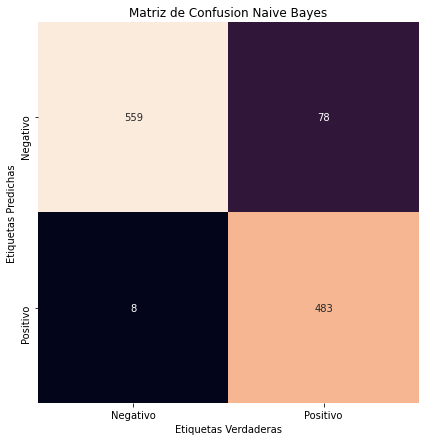

In [34]:
mat = confusion_matrix(y_test, labelPred)
plt.subplots(figsize=(7,7))

ax = plt.axes()

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], ax=ax)

ax.set_title('Matriz de Confusion Naive Bayes')

plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas')

# Accuaracy del 92% vamos a comprobarlo con otros modelos 

In [35]:
TP = mat[1, 1]
TN = mat[0, 0]
FP = mat[0, 1]
FN = mat[1, 0]

classErrorNB = (1 - accuaracy)
classErrorNB

0.07624113475177308

In [36]:
recallNB = recall_score(y_test, labelPred)

In [37]:
specificityNB = TN / (TN + FP)

In [38]:
specificityNB

0.9858906525573192

In [39]:
precisionNB = precision_score(y_test, labelPred)

In [40]:
f1NB = f1_score(y_test, labelPred)

In [41]:
f1NB

0.9182509505703421

In [42]:
dictNB = {
    'Modelo': 'Naive Bayes',
    'Accuracy': accuaracy,
    'Classification Error': classErrorNB,
    'Recall': recallNB,
    'Specificity': specificityNB,
    'Precision': precisionNB,
    'F1 Score': f1NB,
}


In [43]:
dictNB

{'Modelo': 'Naive Bayes',
 'Accuracy': 0.9237588652482269,
 'Classification Error': 0.07624113475177308,
 'Recall': 0.8609625668449198,
 'Specificity': 0.9858906525573192,
 'Precision': 0.9837067209775967,
 'F1 Score': 0.9182509505703421}

In [44]:
scores_para_df = []

# Defino algunos valores para C
C_tunning = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in C_tunning:
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    lg = linear_model.LogisticRegression(C=i, max_iter=500)
    
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
    cv_scores = cross_val_score(lg, X_train, y_train, cv=5)
    
    # Para cada valor de C, creo un diccionario con el valor de C y la media y el desvío de los scores.
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'C':i}
    
    # Guardo cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [45]:
scores = pd.DataFrame(scores_para_df)
scores[scores["score_medio"] == scores["score_medio"].max()]

,score_medio,score_std,C
2,0.9669,0.007697,0.1


In [79]:
lgFinal = linear_model.LogisticRegression(C = 0.1)
lgFinal.fit(X_train, y_train)
yPredLgFinalTest = lgFinal.predict(X_test)

C:\Users\LucasUser\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:438: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [47]:
accLG = accuracy_score(y_test, yPredLgFinalTest)
accLG

0.9671985815602837

<AxesSubplot:>

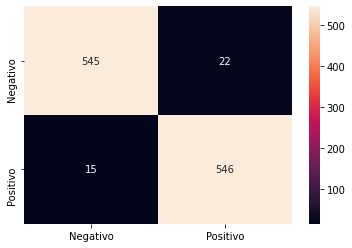

In [48]:
matLG = confusion_matrix(y_test, yPredLgFinalTest)

ax = plt.axes()

sns.heatmap(matLG, fmt="d", annot = True,xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], ax = ax)

In [49]:
TP = matLG[1, 1]
TN = matLG[0, 0]
FP = matLG[0, 1]
FN = matLG[1, 0]

classErrorLG = (1 - accLG)

recallLG = recall_score (y_test, yPredLgFinalTest)

specificityLG = TN / (TN + FP)

precisionLG = precision_score(y_test, yPredLgFinalTest)

f1LG = f1_score(y_test, yPredLgFinalTest)

In [50]:
dictLG = {
    'Modelo': 'Regresion Logistica',
    'Accuracy': accLG,
    'Classification Error': classErrorLG,
    'Recall': recallLG,
    'Specificity': specificityLG,
    'Precision': precisionLG,
    'F1 Score': f1LG,
}


In [51]:
dictLG

{'Modelo': 'Regresion Logistica',
 'Accuracy': 0.9671985815602837,
 'Classification Error': 0.03280141843971629,
 'Recall': 0.9732620320855615,
 'Specificity': 0.9611992945326279,
 'Precision': 0.9612676056338029,
 'F1 Score': 0.9672276350752879}

In [52]:
KNN_scores_para_df = []

# range(1,100,10) son los posibles valores de n_neighbors que quiero explorar. Son todos los enteros desde el 1
# hasta el 100 en saltos de a 10. (Start,Stop,Step)
for i in range(1,100,10):
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
    KNN_cv_scores = cross_val_score(KNN_model, X_train, y_train, cv=5)
    
    # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
    KNN_dict_row_score = {'score_medio':np.mean(KNN_cv_scores),'score_std':np.std(KNN_cv_scores),'n_neighbours':i}
    
    # Guardo cada uno en la lista de diccionarios
    KNN_scores_para_df.append(KNN_dict_row_score)

In [53]:
scoresKNN = pd.DataFrame(KNN_scores_para_df)
scoresKNN[scoresKNN["score_medio"] == scoresKNN["score_medio"].max()]


,score_medio,score_std,n_neighbours
0,0.957148,0.009818,1


In [81]:
KNNFinal = KNeighborsClassifier(n_neighbors=1)

KNNFinal.fit(X_train, y_train)

ypredKNNtest = KNNFinal.predict(X_test)

C:\Users\LucasUser\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:438: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [55]:
accKNN = accuracy_score(y_test, ypredKNNtest)

In [56]:
accKNN

0.9485815602836879

Text(91.68, 0.5, 'Etiquetas Predichas')

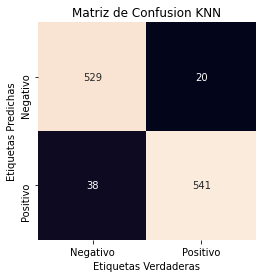

In [57]:
# Matriz de confusión:
matKNN = confusion_matrix(y_test, ypredKNNtest)

ax = plt.axes()

sns.heatmap(matKNN.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], ax=ax)

ax.set_title('Matriz de Confusion KNN')
plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas')

In [58]:
TP = matKNN[1, 1]
TN = matKNN[0, 0]
FP = matKNN[0, 1]
FN = matKNN[1, 0]

class_error_KNN = (1 - accKNN)
recall_KNN = recall_score(y_test, ypredKNNtest)
specificity_KNN = TN / (TN + FP)
precision_KNN = precision_score(y_test, ypredKNNtest)
f1_KNN = f1_score(y_test, ypredKNNtest)

In [59]:
dictKNN = {
    'Modelo': 'KNN',
    'Accuracy': accKNN,
    'Classification Error': class_error_KNN,
    'Recall': recall_KNN,
    'Specificity': specificity_KNN,
    'Precision': precision_KNN,
    'F1 Score': f1_KNN,
}

In [60]:
dictKNN

{'Modelo': 'KNN',
 'Accuracy': 0.9485815602836879,
 'Classification Error': 0.0514184397163121,
 'Recall': 0.964349376114082,
 'Specificity': 0.9329805996472663,
 'Precision': 0.9343696027633851,
 'F1 Score': 0.9491228070175438}

# Comparaciond e resultados

In [61]:
allModels = [dictNB, dictLG, dictKNN]
resultsAllModels = pd.DataFrame(allModels)

resultsAllModels = resultsAllModels[['Modelo','Accuracy','Classification Error','Recall','Specificity','Precision','F1 Score']]

In [62]:
resultsAllModels

,Modelo,Accuracy,Classification Error,Recall,Specificity,Precision,F1 Score
0,Naive Bayes,0.923759,0.076241,0.860963,0.985891,0.983707,0.918251
1,Regresion Logistica,0.967199,0.032801,0.973262,0.961199,0.961268,0.967228
2,KNN,0.948582,0.051418,0.964349,0.932981,0.934370,0.949123


# Graficos comparativos

In [63]:
### Comparacion de las metricas de todos los modelos

## Naive Bayes como baseline
trace1 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultsAllModels['Accuracy'][0], resultsAllModels['Recall'][0], resultsAllModels['Precision'][0], resultsAllModels['F1 Score'][0]],
    name='Naive Bayes'
)


## Regresion logistica
trace2 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultsAllModels['Accuracy'][1], resultsAllModels['Recall'][1], resultsAllModels['Precision'][1], resultsAllModels['F1 Score'][1]],
    name='Logistic Regression'
)


## KNN
trace3 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultsAllModels['Accuracy'][2], resultsAllModels['Recall'][2], resultsAllModels['Precision'][2], resultsAllModels['F1 Score'][2]],
    name='KNN'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'Comparacion de Metricas'
)

fig = go.Figure(data=data, layout=layout)

#py.iplot(fig, filename='grouped-bar')
fig.show()



# Creamos un modelo de ensambles

usamos el dataset full que todavia esta limpio

In [64]:
fullModel = full

In [65]:
Xmodel = fullModel.drop("Phishy", axis = 1)

yModel = fullModel.Phishy

print(Xmodel.shape, yModel.shape)

(4512, 12) (4512,)


In [75]:
X.shape

(4512, 111)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(Xmodel, yModel,random_state = 127)

In [67]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

In [87]:
def predict_ensamble(Xmodel, model1, model2, model3):
    y_pred1 = model1.predict(Xmodel)
    y_pred2 = model2.predict(Xmodel)
    y_pred3 = model3.predict(Xmodel)
    return (y_pred1 + y_pred2 + y_pred3) / 3

In [88]:
#los modelos estan entrenados con 111 features, reejecutar la celda para limpiarlos
y_pred_ensamble = predict_ensamble(X_test_scl, modelNB, lgFinal, KNNFinal)
performance_ensamble = mean_squared_error(y_test, y_pred_ensamble)


# todo list the pipeline and the pickle 

In [ ]:
# generate a pipeline with the Naive Bayes model
pipeNB = Pipeline([('scaler', StandardScaler()), ('model', modelNB)])
# fit the pipeline
pipeNB.fit(X_train_scl, y_train)
# predict on the test set
y_pred_ensamble_NB = pipeNB.predict(X_test_scl)
# compute the performance
performance_ensamble_NB = mean_squared_error(y_test, y_pred_ensamble_NB)
#fix this lol
